<a href="https://colab.research.google.com/github/ion-ian/MachineLearning_Code/blob/master/SobelEdge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

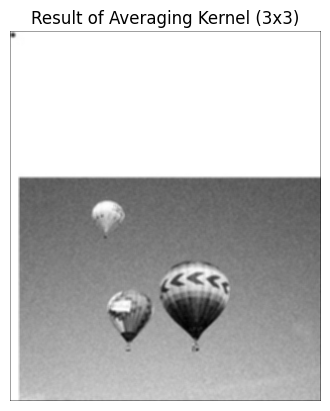

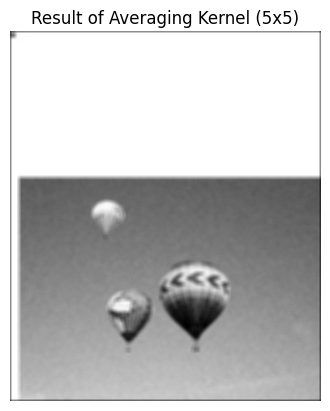

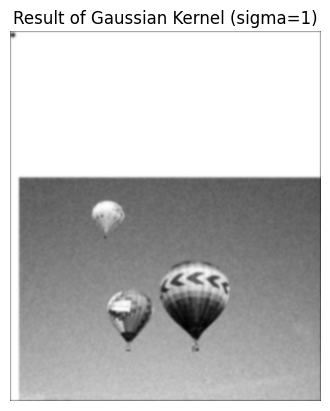

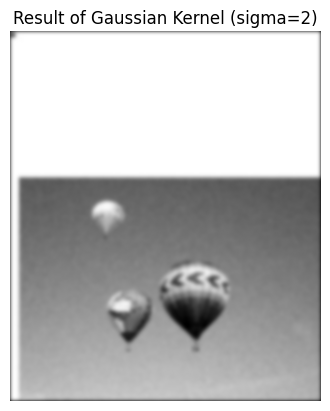

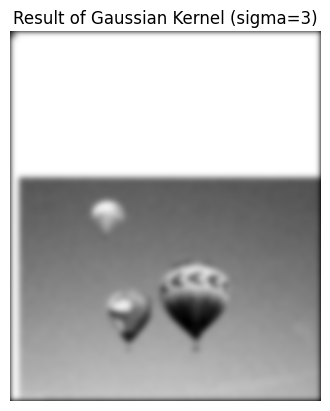

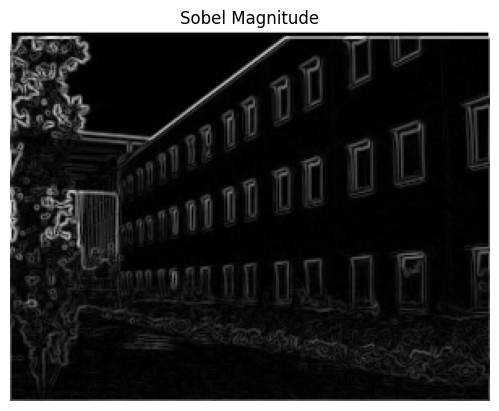

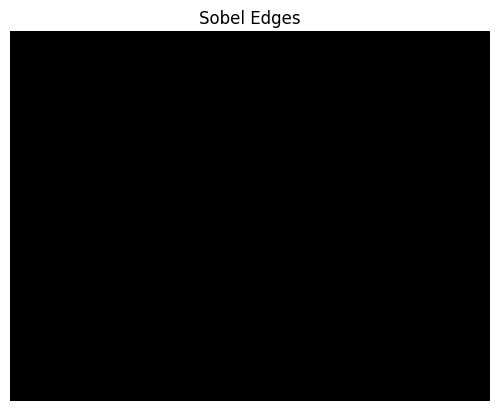

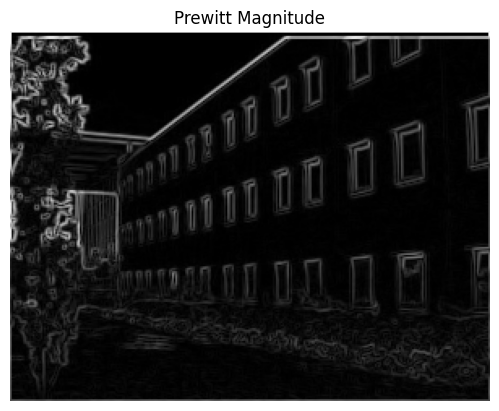

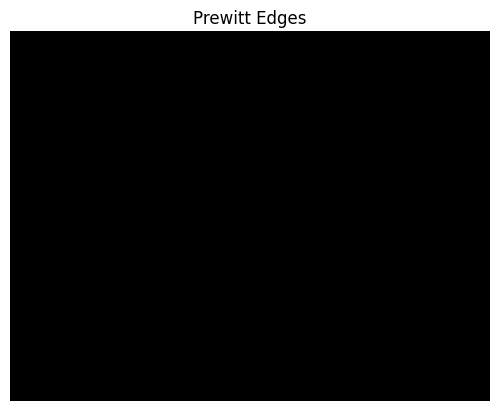

In [3]:
import numpy as np
from scipy.signal import convolve2d
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
from skimage import io, color
def convolution(image, kernel):
    return convolve2d(image, kernel, mode='same', boundary='fill', fillvalue=0)
def generate_gaussian_kernel(sigma):
    size = int(3 * sigma) * 2 + 1
    x = np.linspace(-int(3 * sigma), int(3 * sigma), size)
    y = np.linspace(-int(3 * sigma), int(3 * sigma), size)
    x, y = np.meshgrid(x, y)
    kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    return kernel / kernel.sum()
def apply_kernels(image_path, kernels):
    image = io.imread(image_path)
    if len(image.shape) == 3:
        image = color.rgb2gray(image)
    results = {}
    for name, kernel in kernels.items():
        results[name] = convolution(image, kernel)
        plt.figure()
        plt.title(f"Result of {name}")
        plt.imshow(results[name], cmap='gray')
        plt.axis('off')
    plt.show()
    return results
def edge_detection(image_path, sobel_kernels, prewitt_kernels, threshold):
    image = io.imread(image_path)
    if len(image.shape) == 3:
        image = color.rgb2gray(image)

    def gradient_magnitude(horizontal, vertical):
        return np.sqrt(horizontal**2 + vertical**2)

    # Sobel edge detection
    sobel_horizontal = convolution(image, sobel_kernels['horizontal'])
    sobel_vertical = convolution(image, sobel_kernels['vertical'])
    sobel_magnitude = gradient_magnitude(sobel_horizontal, sobel_vertical)

    # Prewitt edge detection
    prewitt_horizontal = convolution(image, prewitt_kernels['horizontal'])
    prewitt_vertical = convolution(image, prewitt_kernels['vertical'])
    prewitt_magnitude = gradient_magnitude(prewitt_horizontal, prewitt_vertical)

    sobel_edges = sobel_magnitude > threshold
    prewitt_edges = prewitt_magnitude > threshold

    plt.figure()
    plt.title("Sobel Magnitude")
    plt.imshow(sobel_magnitude, cmap='gray')
    plt.axis('off')

    plt.figure()
    plt.title("Sobel Edges")
    plt.imshow(sobel_edges, cmap='gray')
    plt.axis('off')

    plt.figure()
    plt.title("Prewitt Magnitude")
    plt.imshow(prewitt_magnitude, cmap='gray')
    plt.axis('off')

    plt.figure()
    plt.title("Prewitt Edges")
    plt.imshow(prewitt_edges, cmap='gray')
    plt.axis('off')

    plt.show()

averaging_kernel_3x3 = np.ones((3, 3)) / 9
averaging_kernel_5x5 = np.ones((5, 5)) / 25
sobel_horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
prewitt_horizontal = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_vertical = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
balloon_image_path = "/content/balloonGrayNoisy.jpg"
building_image_path = "/content/buildingGray.jpg"
kernels = {
    "Averaging Kernel (3x3)": averaging_kernel_3x3,
    "Averaging Kernel (5x5)": averaging_kernel_5x5,
    "Gaussian Kernel (sigma=1)": generate_gaussian_kernel(1),
    "Gaussian Kernel (sigma=2)": generate_gaussian_kernel(2),
    "Gaussian Kernel (sigma=3)": generate_gaussian_kernel(3),
}
apply_kernels(balloon_image_path, kernels)
sobel_kernels = {"horizontal": sobel_horizontal, "vertical": sobel_vertical}
prewitt_kernels = {"horizontal": prewitt_horizontal, "vertical": prewitt_vertical}
edge_detection(building_image_path, sobel_kernels, prewitt_kernels, threshold=50)
